### Sampling analogy tasks

#### Introduction

The `InfiniteDSpritesAnalogies` dataset is an infinite stream of image prompts like this one:

![Analogy Task](img/analogy.png "Title")

The task is to extract the transformation that maps the reference source (top left) to reference target (top right) and apply it to the query source (bottom left) to get query target (bottom right). At test time, the query target is masked out. Note that the reference source and the query source differ only with respect to shape.

#### Quick start
The easiest way to get started is to create an instance of `InfiniteDSpritesAnalogies`. It is a subclass of PyTorch `IterableDataset`, so it is possible to iterate over it using a `Dataloader`.

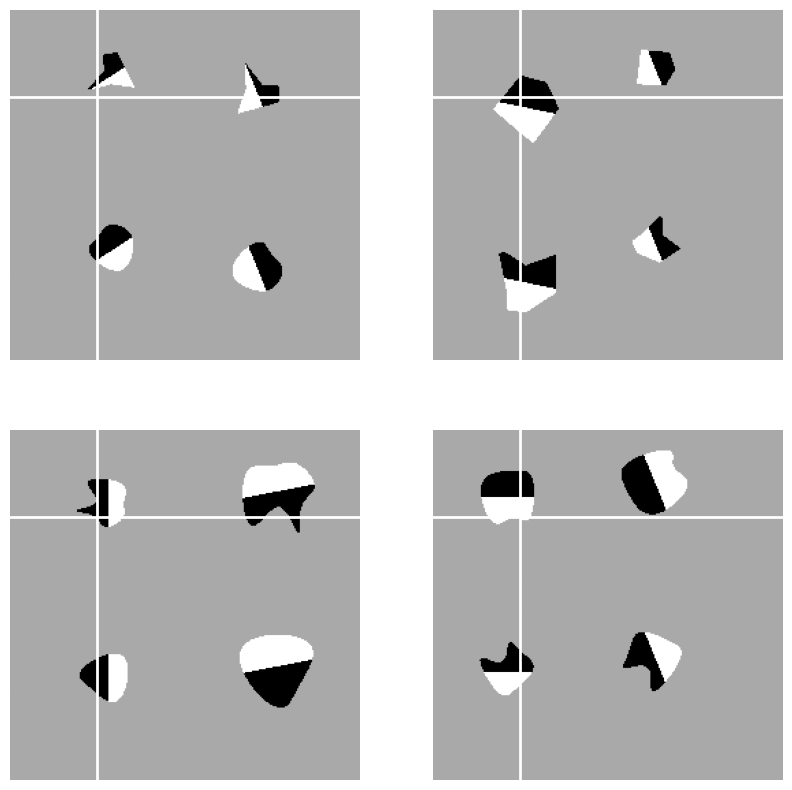

In [2]:
import numpy as np

from torch.utils.data import DataLoader

from idsprites import InfiniteDSpritesAnalogies
from idsprites.visualization import draw_batch

dataset = InfiniteDSpritesAnalogies()
dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))
img = draw_batch(batch, show=True)

##### Easier variants
To produce an easier variant of the task, you can use the constructor arguments to control the range from which each latent is sampled:

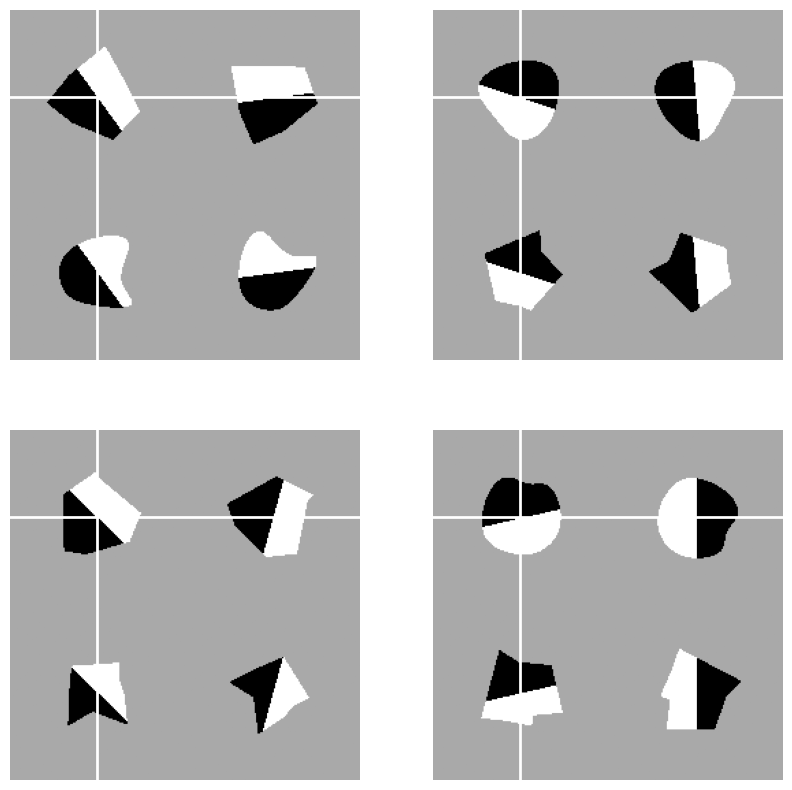

In [4]:
# only change the orientation
dataset = InfiniteDSpritesAnalogies(
    scale_range = [1],
    orientation_range = np.linspace(0, 2 * np.pi, 36),
    position_x_range = [0.5],
    position_y_range = [0.5],
)
dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))
img = draw_batch(batch, show=True)

To make the task even simpler, you can fix the reference and query shapes. Specific shapes will be supported in the future, but for now the syntax is a bit awkward. 

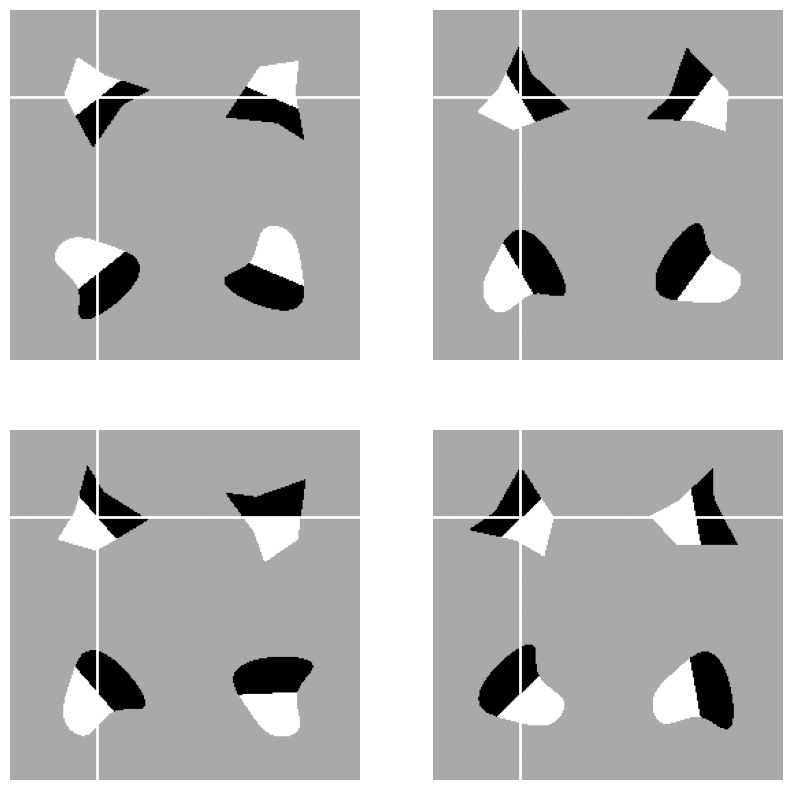

In [5]:
dataset.reference_shape = dataset.generate_shape()
dataset.query_shape = dataset.generate_shape()

dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))
img = draw_batch(batch, show=True)

In order to ensure reproducibility, you can seed the NumPy random number generator.

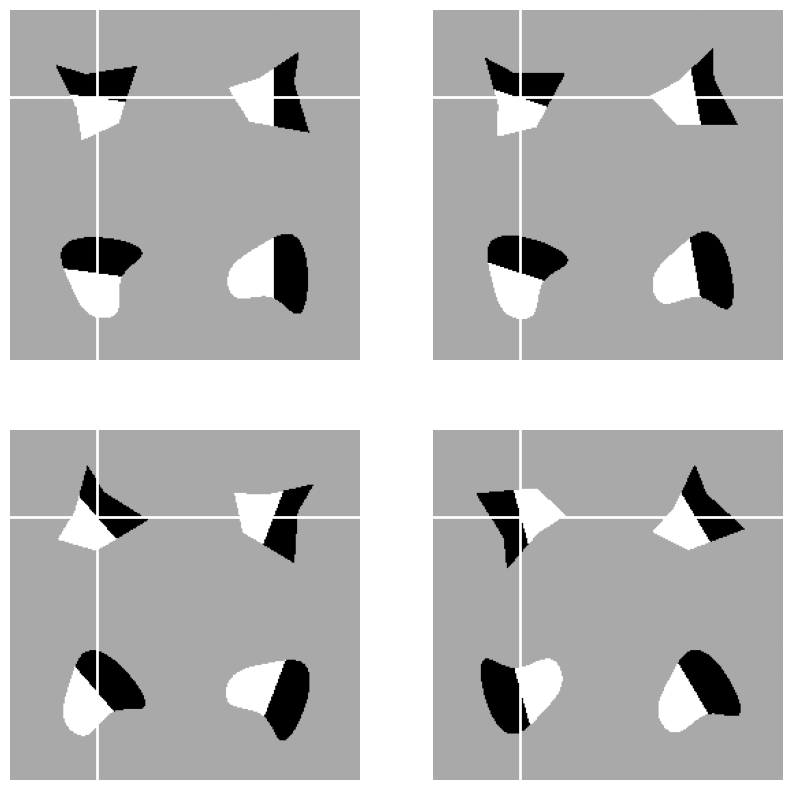

In [6]:
np.random.seed(42)

dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))
img = draw_batch(batch, show=True)